In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#import numba as nb
import sys
from scipy.integrate import odeint

In [14]:
A = np.array([[2,1],[-1,1]]) #maybe change variable types
B = np.array([[1],[2]])
C = np.array([[1,1]])
K = np.array([[4,1]])
L = np.array([[-19],[29]])
Abar = np.block([[A-np.matmul(B,K),np.matmul(B,K)],[np.zeros((2, 2)),A-np.matmul(L,C)]])

print(Abar)

[[ -2.   0.   4.   1.]
 [ -9.  -1.   8.   2.]
 [  0.   0.  21.  20.]
 [  0.   0. -30. -28.]]


Above, we have an example of how to construct the block matrix that utilizes the separation principle! That is, we place the poles of the full state regulator $A-BK$ and observer $A-LC$ separately.
\begin{bmatrix}
A-BK & BK \\
0 & A-LC \\
\end{bmatrix}


In the derivs, we see something that looks like this:

$$
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2 \\
\end{bmatrix} = \begin{bmatrix}
A-BK & BK \\
0 & A-LC \\
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix}$$


If one wishes to find L using Python, use 
    control.acker(A',C',p)' 
where p is a vector of desired pole locations.


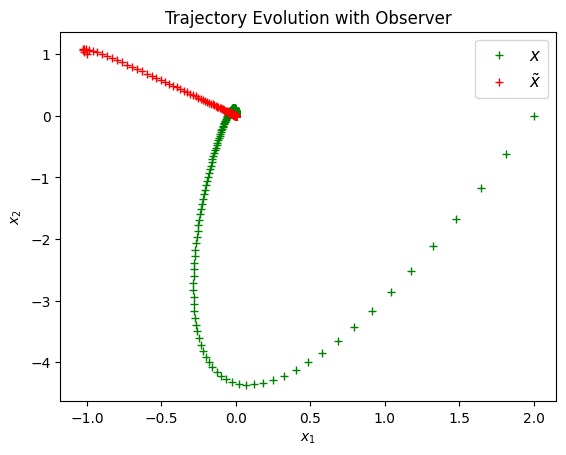

In [4]:
def derivs(t, y): 
    #y[0] = x
    #y[1] = p
    #think of y as our dependent variables and t as independent
    derivs = np.zeros(4) #4 state space variables
    #derivs[0] = y[1]/m #dx/dt
    #derivs[1] = -k*y[0]**3 #dp/dt
    A = np.array([[2,1],[-1,1]]) #maybe change variable types
    B = np.array([[1],[2]])
    C = np.array([[1,1]])
    K = np.array([[4,1]])
    L = np.array([[-19],[29]])
    Abar = np.block([[A-np.matmul(B,K),np.matmul(B,K)],[np.zeros((2, 2)),A-np.matmul(L,C)]])
    derivs = np.matmul(Abar, y)

    return derivs

def fourthorderRK(t, y, dt, F):
    k1 = dt * F(t, y)
    y_est = y + 0.5*k1
    k2 = dt * F(t+dt/2, y_est)
    y_est2 = y + 0.5*k2
    k3 = dt * F(t+dt/2, y_est2)
    y_est3 = y + k3
    k4 = dt * F(t+dt, y_est3)

    step = (1/6)*(k1 + 2*k2 + 2*k3 + k4)

    return step

tstart = 0
tend = 8
steps = 300

def fourthorderstepper(N):
    t = np.linspace(tstart,tend,N)
    y = np.zeros((4,N)) #our solutions march horizontally
    #initial conditions of all states go below
    y[0,0] = 2
    y[1,0] = 0
    y[2,0] = -1
    y[3,0] = 1
    dt = t[1] - t[0]

    for i in range(1,N):
        y[:,i] = y[:,i-1] + fourthorderRK(t[i-1], y[:,i-1], dt, derivs)

    return t, y, dt

o_time, o_y, o_dtime = fourthorderstepper(steps) #the solutions achieved by stepping

#plt.scatter(output[0],output[1], marker="o", c='cyan')
#plt.scatter(output[2],output[3], marker="o", c='cyan')
plt.plot(o_y[0],o_y[1], "+g",label ='$x$')
plt.plot(o_y[2],o_y[3], "+r",label ='$\~{x}$')
#linestyle = ':', color = 'purple')
plt.title("Trajectory Evolution with Observer")
plt.xlabel(r"$x_1$", fontsize=10)
plt.ylabel(r"$x_2$", fontsize=10)
plt.legend(loc = "upper right", prop={'size': 12})
plt.show()

We can compare the convergence of the state to the origin to the convergence of the estimator error. The estimated state of x is $\hat{x}$.

$$\hat{x} = x + \~{x}$$

In [3]:
#this compares the twonorms for state and obbserver
import time
twonormx = np.zeros(steps)
twonormxs = np.zeros(steps)

for i in range(steps):
    twonormx[i] = np.sqrt(o_y[0,i]**2+o_y[1,i]**2)
    twonormxs[i] = np.sqrt(o_y[2,i]**2+o_y[3,i]**2)

plt.plot(o_time,twonormx, "-g",label ='$||x||$')
plt.plot(o_time,twonormxs, "-r",label ='$||\~{x}||$')
#linestyle = ':', color = 'purple')
plt.title("Two-norm Evolution with Observer")
plt.xlabel("time", fontsize=10)
#plt.ylabel(r"$x_2$", fontsize=10)
plt.legend(loc = "upper right", prop={'size': 12})
plt.show()

NameError: name 'steps' is not defined